# Lab 6:
## Authors: Declan Sheehan, Jack Stoetzel
## Description: By implementing k Nearest Neighbors (kNN), we can simulate machine learning by predicting a result given input. This can be applied many kinds of datasets; more specifically - the iris and adults datasets.

#### Task 2:
- Create a Python class to implement kNN.
    - Include methods: train & predict.
        - Train takes in an array of pre-labeled data and store them to be used in the kNN calculation later.
        - Predict takes in a single data point, and return the label of the kNN decision.
        - Test the algorithm on hand-made data.
#### Task 3:
- Write a routine to split the data randomly.


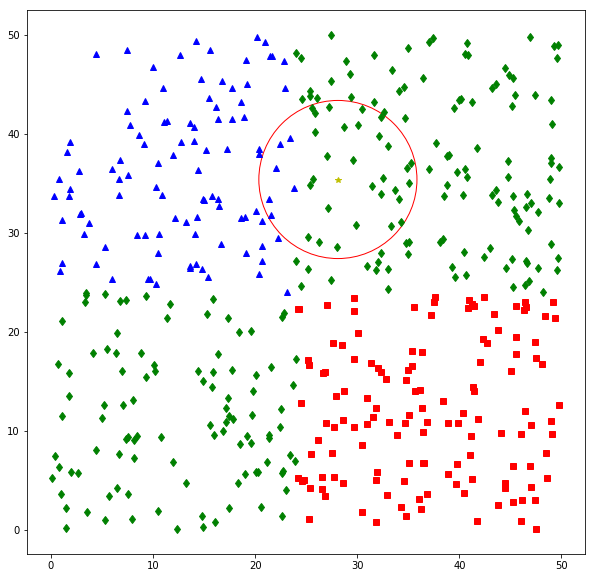

Point 28.109259123798182 , 14.21409546382842 is Green


In [27]:
# Task 2 & 3:
import os
import math
import random
import operator
import pylab as pl
from numpy import *
import matplotlib.pyplot as plt

# Class for the k-nearest neighbor.
class kNN:
    # Initialize variables.
    def __init__(self, train_data, full_data, labels, k):
        super().__init__()
        self.k = k
        self.labels = labels
        self.distance = None
        self.train(train_data, full_data)
        
    # Set the training datapoints for use later.
    def train(self, train_data, full_data):
        self.full_data = full_data
        self.train_data = train_data
        self.train_size = train_data.shape[0]
        
    # Calculates the distance from all points.
    def distances(self, sample):
        # Calculate the Euclidian distance for all data:
        # Get the difference matrix between the sample against training data.
        diffMatrix = tile(sample, (self.train_size, 1)) - self.train_data
        self.distance = ((diffMatrix ** 2).sum(axis = 1) ** 0.5)
        
    # Prediction function that counts the classes of the points nearest.
    def predict(self, sample):
        self.distances(sample)
        sortedIndices = self.distance.argsort()
        
        # For the k-closest points:
        red, blue, green, Class = 0, 0, 0, ''
        for num in range(self.k):
            votedPoints = sortedIndices[num]
            # Count the number of reds and blues.
            if self.full_data[votedPoints][2] == 'red':
                red+=1
            elif self.full_data[votedPoints][2] == 'blue':
                blue+=1
            else:
                green+=1
                
        # Determine if the point should be red or blue.
        values = array([red, green, blue]).argsort()
        if values[2] == 0:
            Class = 'Red'
        elif values[2] == 1:
            Class = 'Green'
        else:
            Class = 'Blue'
        
        self.print_plot(sample)
        return Class
    
    # Print the plot for visualization.
    def print_plot(self, sample):
        red_x, red_y, blue_x, blue_y, green_x, green_y = [], [], [], [], [], []
        for num in range(self.train_size):
            if self.full_data[num][2] == 'red':
                red_x.append(self.train_data[num][0])
                red_y.append(self.train_data[num][1])
            elif self.full_data[num][2] == 'blue':
                blue_x.append(self.train_data[num][0])
                blue_y.append(self.train_data[num][1])
            else:
                green_x.append(self.train_data[num][0])
                green_y.append(self.train_data[num][1])
                
        plt.figure(figsize=(10, 10))
        plt.plot(red_x, red_y, 'rs', blue_x, blue_y, 'b^', green_x, green_y, 'gd', sample[0], sample[1], 'y*')
        plt.scatter(sample[0], sample[1], s=25000, facecolors='none', edgecolors='r')
        plt.show()

# Generates a given number of points from (0.0, 0.0) to (50.0, 50.0)
# and gives them a color based on positioning.
def generate_data(size):
    full_data = []
    part_data = []
    for i in range(size):
        x = random.uniform(0, 50)
        y = random.uniform(0, 50)

        if x >= 24 and y <= 24:
            full_data.append([x, y, 'red'])
        elif x <= 24 and y >= 24:
            full_data.append([x, y, 'blue'])
        else:
            full_data.append([x, y, 'green'])
        part_data.append([x, y])
    return full_data

# Task 3 split data method.
def splitData(full_data, p):
    random.shuffle(full_data)
    n = len(full_data)
    training, full, testing = [], [], []
    for num in range(math.floor(int(n * (1 - p)))):
        testing.append(full_data[num][:-1])
    for num in range(math.floor(int(n * p))):
        training.append(full_data[num + math.floor(int(n * (1 - p)))][:-1])
        full.append(full_data[num + math.floor(int(n * (1 - p)))])
                   
    return training, testing, full

# Generate and split the data.
full_data = generate_data(500)
training_data, testing_data, full_data = splitData(full_data, 0.95)

# Test the data and print out a result.
model = kNN(array(training_data), array(full_data), ['Red', 'Blue', 'Green'], 25)
prediction = model.predict(array(testing_data[0]))
print('Point', testing_data[0][0], ',', testing_data[1][0], 'is', prediction)